<a href="https://colab.research.google.com/github/pgordin/GraphsSN2025/blob/main/Klaudia_Szozda_250391_Stable_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Matching Problem and the Gale–Shapley Algorithm

## Introduction

The **stable matching problem** was introduced by Gale and Shapley in 1962 using the marriage and college admissions models, and has since found applications far beyond these original settings. Similar mechanisms are used today in **recruitment systems**, **school admissions**, **hospital–resident assignments**, and many other allocation problems.

We consider two equally sized groups:
- `n` gentlemen and `n` ladies,
- each person has a **strict (linear) preference order** over all members of the opposite group.

Our goal is to create **perfect matchings** (everyone is matched) such that the result is **stable**.

---

## What Is Stability?

Suppose the current matching contains the couples:

- **John** is matched with **Lia**

- **Michael** is matched with **Emily**

This pair is **unstable** if:

- **John prefers Emily** over his current partner **Lia**, and

- **Emily prefers John** over her current partner **Michael**

Even though John and Emily are not matched to each other, they would both be happier together than in their current relationships. Therefore, (John, Emily) is an **unstable pair**, and the *matching is not stable*.

If such a pair exists, the matching is *not stable*, because both would benefit from abandoning their current matches.

### Definition

A **stable matching** is a perfect matching that contains **no unstable pairs**.

---

## Example Preferences

Consider the following example with four gentlemen and four ladies.

### Gentlemen’s preferences
`1 : a > b > c > d`

`2 : a > c > b > d`

`3 : c > d > a > b`

`4 : c > b > a > d`

Ladies’ preferences

`a : 3 > 1 > 2 > 4`

`b : 2 > 4 > 1 > 3`

`c : 4 > 1 > 2 > 3`

`d : 1 > 2 > 3 > 4`

A naive matching might look reasonable at first, but if it creates even one unstable pair, it can fail in practice.

---

## The Gale–Shapley Proposal Algorithm (1962)

To systematically construct a stable matching, Gale and Shapley proposed a **proposal-based algorithm**.

### Algorithm Idea

One side of the bipartition (here: gentlemen) actively proposes, while the other side (ladies) responds.

### Step-by-step Procedure

1. **Each unengaged man proposes** to the most preferred woman who has not yet rejected him.
2. **Each woman considers all proposals** she receives:
   - If she receives only one proposal, she keeps it (temporarly).
   - If she receives multiple proposals, she **keeps the best one** according to her preferences and **rejects all others**.
3. Rejected men move on and propose again in the next round.
4. The process repeats until **everyone is engaged**.

Importantly, engagements are *temporary* until the algorithm finishes.

---
### **Round 1**

Each unengaged man proposes to his top choice:

1 → a

2 → a

3 → c

4 → c

Now each woman considers the proposals she received:

a receives proposals from 1 and 2
→ she prefers 1, so she tentatively accepts 1 and rejects 2

c receives proposals from 3 and 4
→ she prefers 4, so she tentatively accepts 4 and rejects 3

b and d receive no proposals

Tentative engagements after Round 1:

(1, a)

(4, c)

Rejected men: 2, 3


## How the Algorithm Works (Intuition)

- Men gradually “work down” their preference lists.
- Women always hold onto the **best proposal they have seen so far**.
- Once a woman rejects a man, she will **never accept him later**, because she already has (or will have) a better option.

This monotonic behavior guarantees progress and termination.

---

## Why the Algorithm Produces a Stable Matching

### Termination

- Each man proposes to each woman **at most once**.
- There are finitely many proposals (`n²` at most), so the algorithm must terminate.

### Stability Proof (Idea)

Assume, for contradiction, that the final matching contains an unstable pair `(John, Emily)`.

- `John` prefers `Emily` over his assigned partner.
- Therefore, `John` must have proposed to `Emily` **before** proposing to his final partner.
- If `Emily` rejected `John`, it means she was holding a proposal from someone she preferred more.
- Since women only “trade up,” her final partner must be **at least as good** as that proposer.
- Hence, `Emily` cannot prefer `John` over her final partner — contradiction.

So, no unstable pair can exist.

---

## Key Properties of the Gale–Shapley Algorithm

- **Always finds a stable matching**, regardless of preferences.
- **Simple and decentralized** — each participant only needs their own preference list.
- **Widely applicable** (e.g. school admissions, job matching).
- The algorithm is **biased in favor of the proposing side**:
  - Proposers get their *best possible* stable partners.
  - The receiving side gets their *worst* stable partners.
- There may be **multiple stable matchings**, but this algorithm finds one extreme solution.

---

## Conclusion

The stable matching problem captures a fundamental challenge in fair allocation systems.  
The Gale–Shapley algorithm provides a powerful and elegant solution that guarantees stability, efficiency, and practical usability.

Despite its simplicity, it remains one of the most influential algorithms in economics, computer science, and operations research.


In [ ]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt


def stable_matching_rounds(proposers_prefs, receivers_prefs):
    """
    Gale–Shapley stable matching algorithm (proposer-oriented).
    Proposers make offers, receivers tentatively accept the best one.
    """

    # Set of currently free proposers
    free_proposers = set(proposers_prefs.keys())

    # Index of the next receiver each proposer will propose to
    next_proposal_index = {p: 0 for p in proposers_prefs}

    # Current tentative matching: receiver -> proposer
    matching = {}

    # Receiver preference rankings for fast comparison
    receiver_rank = {
        r: {p: rank for rank, p in enumerate(prefs)}
        for r, prefs in receivers_prefs.items()
    }

    round_number = 1

    # Repeat until all proposers are matched
    while free_proposers:
        print(f"\n--- Round {round_number} ---")

        proposals = {}

        # Step 1: each free proposer proposes to the next preferred receiver
        for proposer in list(free_proposers):
            receiver = proposers_prefs[proposer][next_proposal_index[proposer]]
            next_proposal_index[proposer] += 1
            proposals.setdefault(receiver, []).append(proposer)
            print(f"{proposer} proposes to {receiver}")

        # All proposers are temporarily removed until rejections occur
        free_proposers.clear()

        # Step 2: receivers select the best proposal
        for receiver, proposers in proposals.items():

            # Include current partner if already tentatively matched
            if receiver in matching:
                proposers.append(matching[receiver])

            # Receiver keeps the most preferred proposer
            best = min(proposers, key=lambda p: receiver_rank[receiver][p])
            matching[receiver] = best

            # All others are rejected and become free again
            for p in proposers:
                if p != best:
                    free_proposers.add(p)

        # Current tentative engagements
        print("Current tentative matching:")
        for r, p in matching.items():
            print(f"  {p} ↔ {r}")

        round_number += 1

    # Final stable matching
    print("\n=== Final Stable Matching ===")
    for r, p in matching.items():
        print(f"{p} ↔ {r}")

    return matching


def draw_labeled_bipartite_graph(
    proposers_prefs,
    receivers_prefs,
    matching=None,
    title="Stable Matching with Preference Labels"
):
    """
    Draws a bipartite graph with:
    - edge labels = proposer preference ranks
    - green edges = final stable matching
    """

    G = nx.Graph()

    proposers = list(proposers_prefs.keys())
    receivers = list(receivers_prefs.keys())

    # Add bipartite nodes
    G.add_nodes_from(proposers, bipartite=0)
    G.add_nodes_from(receivers, bipartite=1)

    # Add edges with preference ranks
    for proposer, prefs in proposers_prefs.items():
        for rank, receiver in enumerate(prefs, start=1):
            G.add_edge(proposer, receiver, label=str(rank))

    # Fixed bipartite layout
    pos = {}
    pos.update({p: (0, i) for i, p in enumerate(proposers)})
    pos.update({r: (1, i) for i, r in enumerate(receivers)})

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_size=2600,
            node_color="lightgray", edge_color="gray")

    # Draw preference labels
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Highlight stable matching
    if matching:
        matching_edges = [(p, r) for r, p in matching.items()]
        nx.draw_networkx_edges(G, pos, edgelist=matching_edges,
                               width=3, edge_color="green")

    plt.title(title)
    plt.show()


def draw_stable_matching(proposers_prefs, receivers_prefs, matching):
    """
    Visualizes the final stable matching only.
    """

    G = nx.Graph()
    proposers = list(proposers_prefs.keys())
    receivers = list(receivers_prefs.keys())

    # Nodes
    G.add_nodes_from(proposers, bipartite=0)
    G.add_nodes_from(receivers, bipartite=1)

    # Preference edges
    for p, prefs in proposers_prefs.items():
        for rank, r in enumerate(prefs, start=1):
            G.add_edge(p, r, label=str(rank))

    # Layout
    pos = {}
    pos.update({p: (0, i) for i, p in enumerate(proposers)})
    pos.update({r: (1, i) for i, r in enumerate(receivers)})

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_size=2500,
            node_color="lightblue", edge_color="gray")

    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Final matching
    matching_edges = [(p, r) for r, p in matching.items()]
    nx.draw_networkx_edges(G, pos, edgelist=matching_edges,
                           width=3, edge_color="green")

    plt.title("Stable Matching (Green = Final Match)")
    plt.show()



--- Round 1 ---
1 proposes to a
2 proposes to a
3 proposes to c
4 proposes to c
Current tentative matching:
  1 ↔ a
  4 ↔ c

--- Round 2 ---
2 proposes to c
3 proposes to d
Current tentative matching:
  1 ↔ a
  4 ↔ c
  3 ↔ d

--- Round 3 ---
2 proposes to b
Current tentative matching:
  1 ↔ a
  4 ↔ c
  3 ↔ d
  2 ↔ b

=== Final Stable Matching ===
1 ↔ a
4 ↔ c
3 ↔ d
2 ↔ b


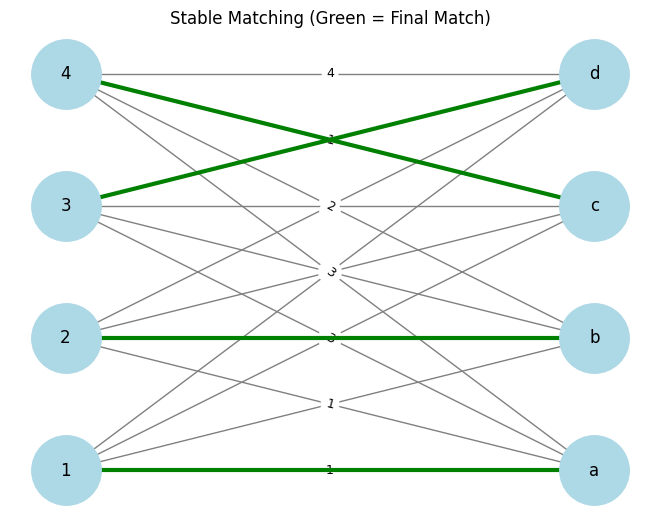

In [ ]:
proposers_prefs = {
    1: ['a', 'b', 'c', 'd'],
    2: ['a', 'c', 'b', 'd'],
    3: ['c', 'd', 'a', 'b'],
    4: ['c', 'b', 'a', 'd']
}

receivers_prefs = {
    'a': [3, 1, 2, 4],
    'b': [2, 4, 1, 3],
    'c': [4, 1, 2, 3],
    'd': [1, 2, 3, 4]
}
stable_matching_result = stable_matching_rounds(proposers_prefs, receivers_prefs)
draw_stable_matching(proposers_prefs, receivers_prefs, stable_matching_result)



In [ ]:
candidates_prefs = {
    "Eve": ["Google", "Amazon", "Microsoft"],
    "Frank": ["Amazon", "Google", "Microsoft"],
    "Grace": ["Microsoft", "Amazon", "Google"]
}

companies_prefs = {
    "Google": ["Frank", "Eve", "Grace"],
    "Amazon": ["Eve", "Grace", "Frank"],
    "Microsoft": ["Grace", "Frank", "Eve"]
}

job_matching = stable_matching_rounds(candidates_prefs, companies_prefs)

job_matching2 = stable_matching_rounds(companies_prefs, candidates_prefs)



--- Round 1 ---
Frank proposes to Amazon
Grace proposes to Microsoft
Eve proposes to Google
Current tentative matching:
  Frank ↔ Amazon
  Grace ↔ Microsoft
  Eve ↔ Google

=== Final Stable Matching ===
Frank ↔ Amazon
Grace ↔ Microsoft
Eve ↔ Google

--- Round 1 ---
Microsoft proposes to Grace
Amazon proposes to Eve
Google proposes to Frank
Current tentative matching:
  Microsoft ↔ Grace
  Amazon ↔ Eve
  Google ↔ Frank

=== Final Stable Matching ===
Microsoft ↔ Grace
Amazon ↔ Eve
Google ↔ Frank


# Christmas Gift Exchange (Top Trading Cycles)

The **gift exchange problem** models a situation where each person initially owns a gift, but may prefer someone else's gift. The goal is to reallocate gifts so that everyone is as satisfied as possible without making anyone worse off.

---

## How It Works

1. Each person points to the owner of their **most preferred available gift**.
2. Since the graph is finite, **at least one cycle** appears.
3. All participants in a cycle **exchange gifts simultaneously**.
4. Those participants leave the process.
5. Repeat with remaining people and gifts until everyone is satisfied.

---

### Key Feature

- The result is **Pareto-optimal**: no one can get a better gift without making someone else worse off.


In [ ]:
def top_trading_cycles(owners, preferences):
    """
    Executes the Top Trading Cycles algorithm.

    Reallocates gifts among participants based on their preferences
    by repeatedly finding cycles and performing exchanges until everyone has a gift.

    Parameters:
        owners (dict): Gift → current owner.
        preferences (dict): Participant → list of preferred gifts.

    Returns:
        dict: Final allocation of gifts to participants.
    """
    active_people = set(preferences.keys())
    active_gifts = set(owners.keys())
    allocation = {}

    round_number = 1

    # Initialize current ownership mapping
    person_to_gift = {owner: gift for gift, owner in owners.items()}

    while active_people:
        print(f"\n--- Round {round_number} ---")

        # Step 1: build pointers
        pointers = {}
        for person in active_people:
            for gift in preferences[person]:
                if gift not in active_gifts:
                    continue  # skip gifts already assigned
                gift_owner = owners[gift]  # owner in the original mapping
                pointers[person] = gift_owner
                print(f"{person} points to {gift_owner} (wants {gift})")
                break

        visited = set()
        to_remove = set()

        # Step 2: detect cycles
        for start in list(active_people):
            if start in visited:
                continue

            path = []
            current = start

            while current not in path and current not in visited:
                path.append(current)
                current = pointers[current]

            if current in path:
                cycle_start = path.index(current)
                cycle = path[cycle_start:]
                print(f"Cycle found: {cycle}")

                # Step 3: execute trades
                for person in cycle:
                    for gift in preferences[person]:
                        if gift not in active_gifts:
                            continue
                        gift_owner = owners[gift]
                        if gift_owner in cycle:
                            allocation[person] = gift
                            person_to_gift[person] = gift
                            print(f"{person} receives {gift}")
                            break

                # mark participants for removal
                for person in cycle:
                    visited.add(person)
                    to_remove.add(person)

        # Step 4: remove satisfied participants
        for person in to_remove:
            gift = allocation[person]
            active_people.remove(person)
            active_gifts.remove(gift)

        round_number += 1

    # Final allocation
    print("\n=== Final Gift Allocation ===")
    for person, gift in allocation.items():
        print(f"{person} → {gift}")

    return allocation


In [ ]:
owners = {
    'Book': 'Alice',
    'Scarf': 'Bob',
    'Mug': 'Carol',
    'Game': 'David',
    'Chocolate': 'Emma'
}

preferences = {
    'Alice': ['Scarf', 'Mug', 'Book', 'Game', 'Chocolate'],
    'Bob': ['Chocolate', 'Mug', 'Book', 'Game', 'Scarf'],
    'Carol': ['Book', 'Scarf', 'Game', 'Mug', 'Chocolate'],
    'David': ['Book', 'Scarf', 'Mug', 'Game', 'Chocolate'],
    'Emma': ['Chocolate', 'Scarf', 'Book', 'Mug', 'Game']
}
top_trading_cycles(owners, preferences)




--- Round 1 ---
Carol points to Alice (wants Book)
Bob points to Emma (wants Chocolate)
Alice points to Bob (wants Scarf)
Emma points to Emma (wants Chocolate)
David points to Alice (wants Book)
Cycle found: ['Emma']
Emma receives Chocolate

--- Round 2 ---
Carol points to Alice (wants Book)
Bob points to Carol (wants Mug)
Alice points to Bob (wants Scarf)
David points to Alice (wants Book)
Cycle found: ['Carol', 'Alice', 'Bob']
Carol receives Book
Alice receives Scarf
Bob receives Mug

--- Round 3 ---
David points to David (wants Game)
Cycle found: ['David']
David receives Game

=== Final Gift Allocation ===
Emma → Chocolate
Carol → Book
Alice → Scarf
Bob → Mug
David → Game


{'Emma': 'Chocolate',
 'Carol': 'Book',
 'Alice': 'Scarf',
 'Bob': 'Mug',
 'David': 'Game'}

Top Trading Cycles works by letting everyone point to what they want most.
Whenever a cycle appears, the people in the cycle exchange goods.
Everyone ends up better off, no one is worse off, and the final allocation cannot be improved further.
Unlike stable matching, the result is unique and focuses on efficiency rather than stability.